# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 3, <font color="blue">легкая часть</font>. Линейная и логистическая регрессии.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко.
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 20 баллов;

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задачи 5-7: скачайте второй ноутбук с условием задания со страницы курса.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad3_part1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 146d04157c07b08ee58d3eafdcf82c32 -->
Рассмотрим модель одномерной линейной регрессии *без свободного параметра* $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

**3.** Опишите, что произойдет, если для некоторого $i$ ошибка $\varepsilon_i$ будет очень большой.


*Замечания.*
1. Это теоретическая задача, не перепутайте 😄
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитайте требования к формату решения в правилах сдачи задания.**

**Решение:**
### Явная формула

Воспользуемся формулой для вычисления коэффициентов с лекции:

$ \theta = (X^T X)^{-1} X^T Y$

В одномерном случае ($X$ - просто вектор):

$ \theta = (\sum{x_i^2})^{-1} * \sum{x_i y_i} = \frac{\sum{x_i y_i}}{\sum{x_i^2}}$

### Градиентный спуск

Каждый раз спускаемся против градиента:

$\theta_{t+1} = \theta_t - \eta X^T (X \theta_t - Y) = \theta_t - \eta \sum{x_i (\theta_t x_i - y_i)}$

### Стохастический градиентный спуск

Если данных очень много, вместо того, чтобы посчитать сумму целиком, выделим какое-то подмножество и поберём коэффициенты по нему:

$\theta_{t+1} = \theta_t - \eta \sum \limits_{i \in I} x_i (\theta_t x_i - y_i)$

Здесь $I$ - произвольный набор элементов из изначальных индексов {1...n}.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### Задача 2.

*Перед выполнением задачи ознакомтесь с <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">ноутбуком по линейной регрессии</a> с занятия.*

Скоро весна и лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов или самокатов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

<img src="https://thetahat.ru/files/ad/main/3/bike1.jpeg">

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [3]:
day = pd.read_csv('day.csv')
day = day[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

train_data, test_data = train_test_split(day, test_size=0.2, random_state=42)

In [4]:
train_data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
682,4,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046,4094
250,3,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,1842
336,4,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783,3614
260,3,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483,4274
543,3,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775,7335


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7e2346d718d374e3f957928b573e2a30 -->
#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

#### Распределение по временам года, месяцам и дням недели

По графикам можно заметить, что зимой велосипеды арендуют сильно реже, чем, например, летом, а весной люди выходят кататься чаще, чем осенью (предполагаю, из-за погоды). Это заметно и на графиках для месяцев, с пиками в районе июня и октября. От дня недели ничего не зависит (даже при фильтрации по рабочим/нерабочим дням), поэтому в дальнейшем этот признак не будет учитываться.

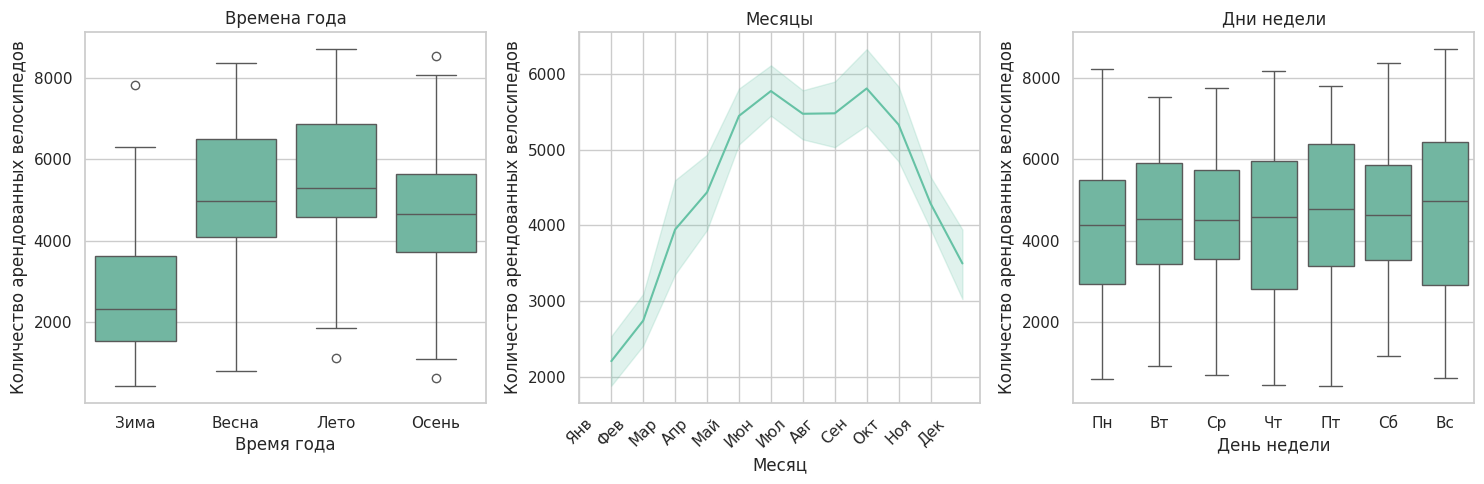

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='season', y='cnt', data=train_data, ax=axes[0])
axes[0].set_title('Времена года')
axes[0].set_xlabel('Время года')
axes[0].set_ylabel('Количество арендованных велосипедов')
axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels(['Зима', 'Весна', 'Лето', 'Осень'])

sns.lineplot(x='mnth', y='cnt', data=train_data, ax=axes[1])
axes[1].set_title('Месяцы')
axes[1].set_xlabel('Месяц')
axes[1].set_ylabel('Количество арендованных велосипедов')
axes[1].set_xticks(range(12))  # Указываем позиции тиков (0-11)
axes[1].set_xticklabels(['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'], rotation=45)  # Задаем новые подписи

sns.boxplot(x='weekday', y='cnt', data=train_data, ax=axes[2])
axes[2].set_title('Дни недели')
axes[2].set_xlabel('День недели')
axes[2].set_ylabel('Количество арендованных велосипедов')
axes[2].set_xticks([0, 1, 2, 3, 4, 5, 6])  # Указываем позиции тиков
axes[2].set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])  # Задаем новые подписи

plt.tight_layout()
plt.show()

#### Распределение от погодных условий

По графикам особой зависимости между скоростью и влажностью и арендой велосипедов не замечено, но температура влияет достаточно сильно: чем теплее на улице, чем чаще люди хотят покататься. Если прогнозируют плохие погодные условия, то люди реже арендуют велосипеды, при этом для любых погодных условий зависимость от температуры восходящая, хотя при худших условиях она ниже. Также на распределение по погодным условиям не влияют ни выходные, ни рабочие дни.

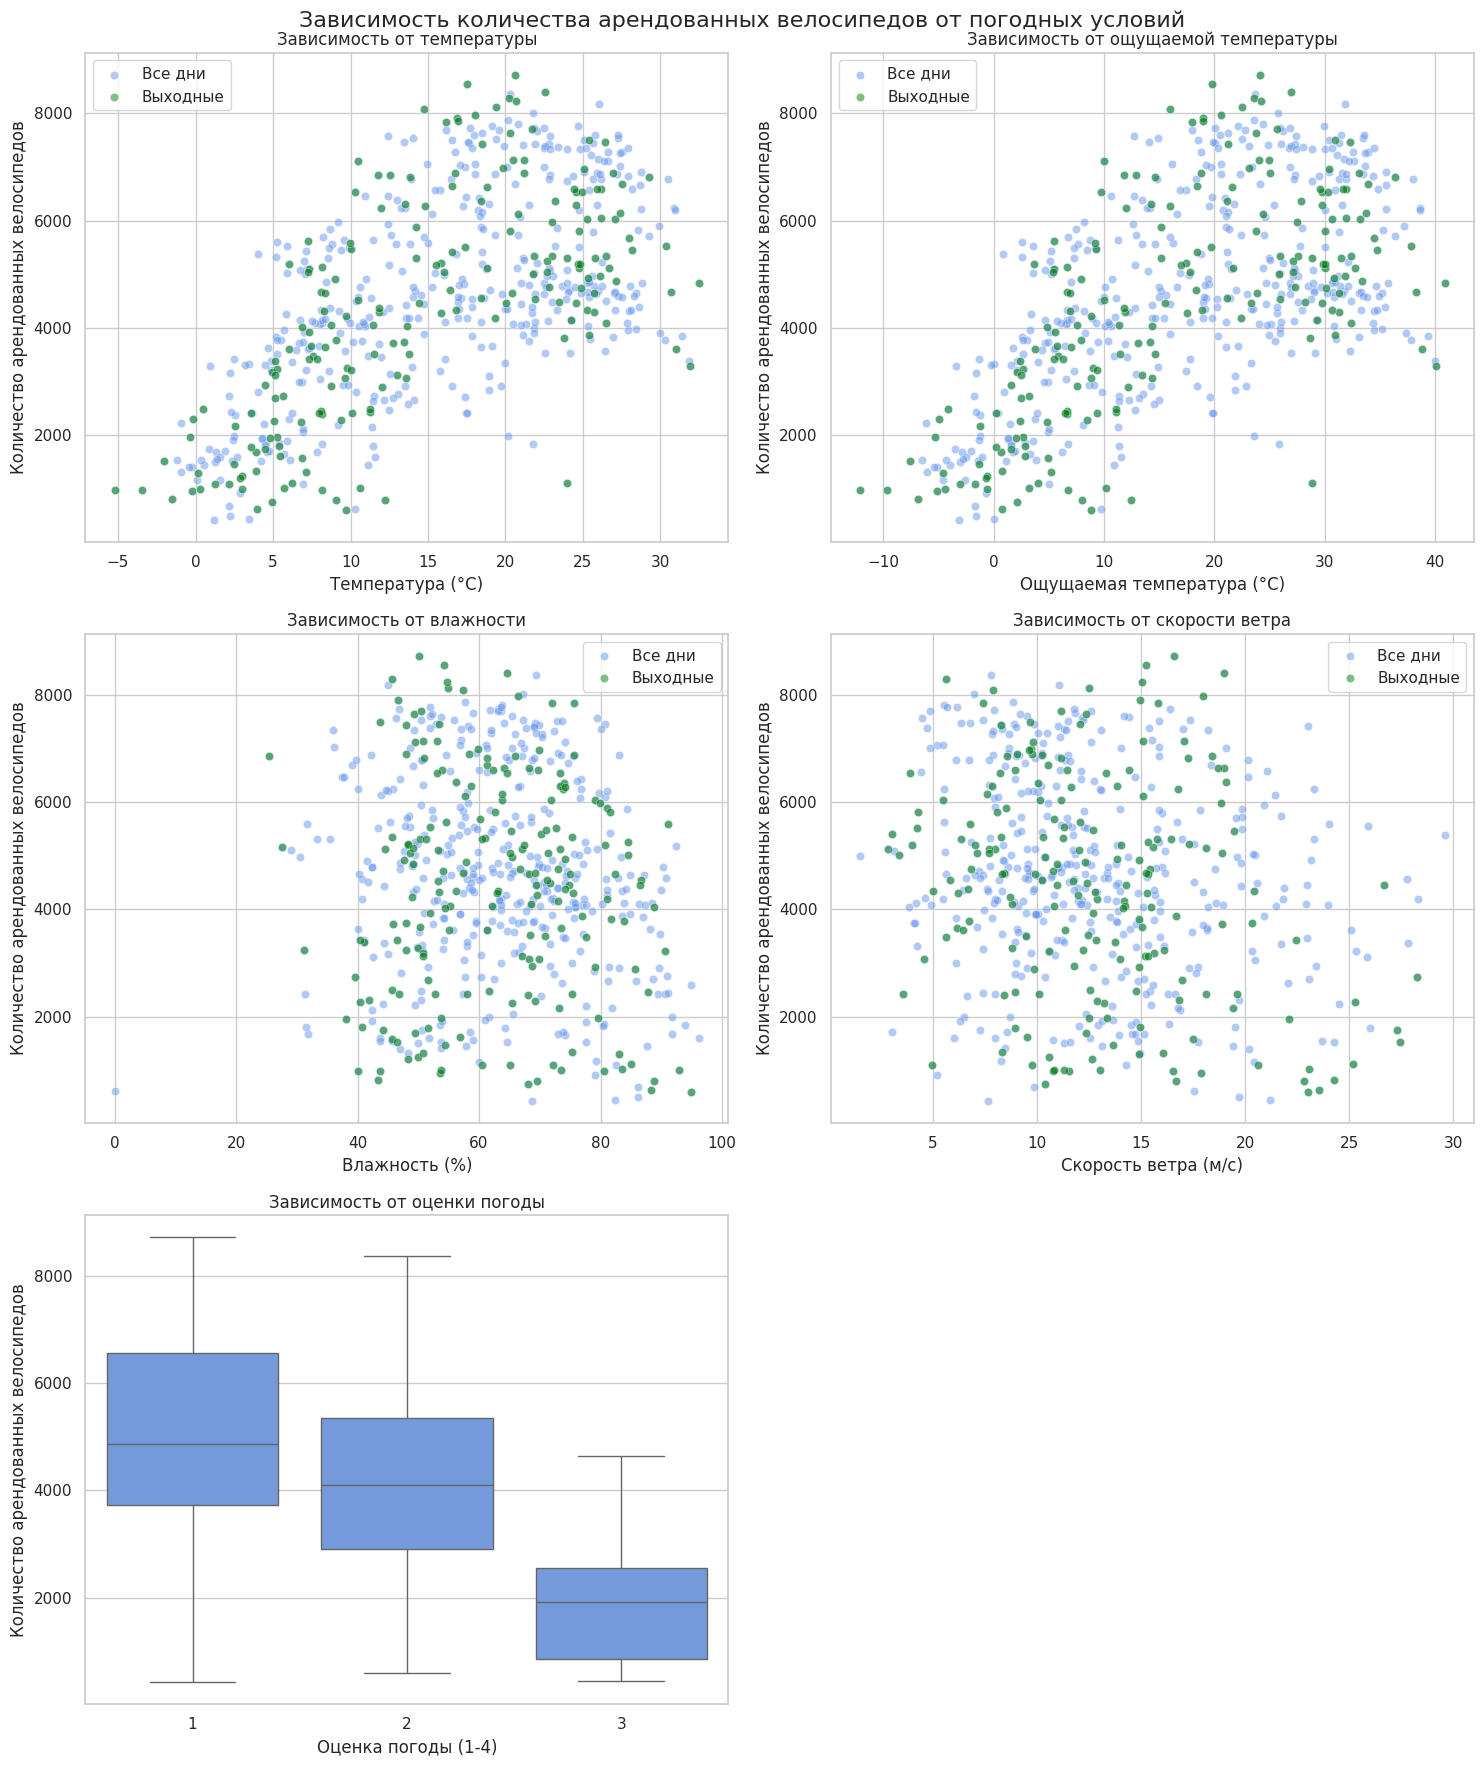

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Зависимость количества арендованных велосипедов от погодных условий', fontsize=16)

sns.scatterplot(x=47 * train_data['temp'] - 8, y='cnt', data=train_data, ax=axes[0, 0], color='cornflowerblue', alpha=0.5, label='Все дни')
sns.scatterplot(x=47 * train_data['temp'] - 8, y='cnt', data=train_data[train_data['workingday'] == 0], color='green', ax=axes[0, 0], alpha=0.5, label='Выходные')
axes[0, 0].set_title('Зависимость от температуры')
axes[0, 0].set_xlabel('Температура (°C)')
axes[0, 0].set_ylabel('Количество арендованных велосипедов')
axes[0, 0].legend()

sns.scatterplot(x=66 * train_data['temp'] - 16, y='cnt', data=train_data, ax=axes[0, 1], color='cornflowerblue', alpha=0.5, label='Все дни')
sns.scatterplot(x=66 * train_data['temp'] - 16, y='cnt', data=train_data[train_data['workingday'] == 0], color='green', ax=axes[0, 1], alpha=0.5, label='Выходные')
axes[0, 1].set_title('Зависимость от ощущаемой температуры')
axes[0, 1].set_xlabel('Ощущаемая температура (°C)')
axes[0, 1].set_ylabel('Количество арендованных велосипедов')
axes[0, 1].legend()

sns.scatterplot(x=train_data['hum'] * 100, y='cnt', data=train_data, ax=axes[1, 0], color='cornflowerblue', alpha=0.5, label='Все дни')
sns.scatterplot(x=train_data['hum'] * 100, y='cnt', data=train_data[train_data['workingday'] == 0], ax=axes[1, 0], color='green', alpha=0.5, label='Выходные')
axes[1, 0].set_title('Зависимость от влажности')
axes[1, 0].set_xlabel('Влажность (%)')
axes[1, 0].set_ylabel('Количество арендованных велосипедов')
axes[1, 0].legend()

sns.scatterplot(x=train_data['windspeed'] * 67, y='cnt', data=train_data, ax=axes[1, 1], color='cornflowerblue', alpha=0.5, label='Все дни')
sns.scatterplot(x=train_data['windspeed'] * 67, y='cnt', data=train_data[train_data['workingday'] == 0], ax=axes[1, 1], color='green', alpha=0.5, label='Выходные')
axes[1, 1].set_title('Зависимость от скорости ветра')
axes[1, 1].set_xlabel('Скорость ветра (м/с)')
axes[1, 1].set_ylabel('Количество арендованных велосипедов')
axes[1, 1].legend()

sns.boxplot(x='weathersit', y='cnt', data=train_data, ax=axes[2, 0], color='cornflowerblue')
axes[2, 0].set_title('Зависимость от оценки погоды')
axes[2, 0].set_xlabel('Оценка погоды (1-4)')
axes[2, 0].set_ylabel('Количество арендованных велосипедов')

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

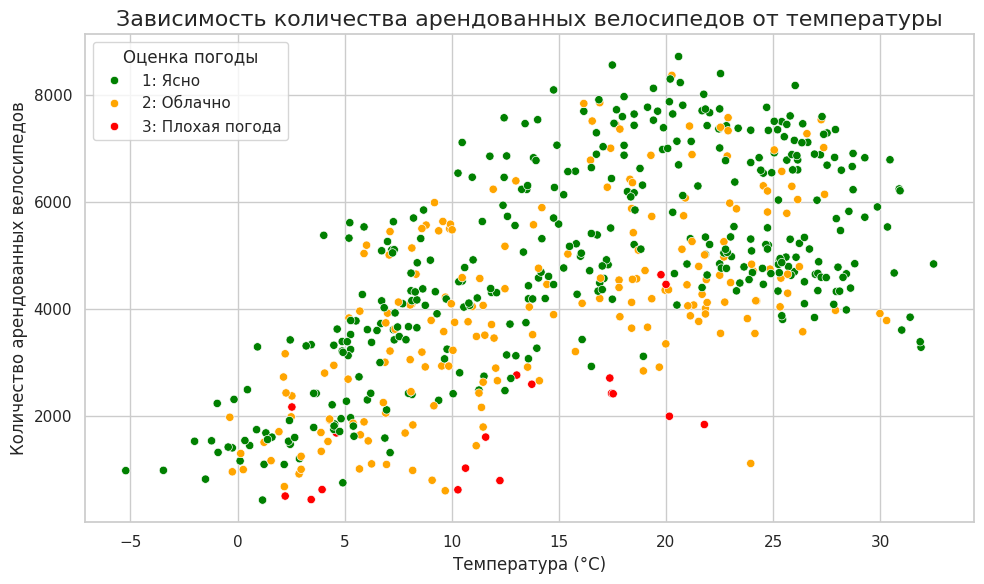

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    x=47 * train_data['temp'] - 8,
    y='cnt',
    hue='weathersit',
    data=train_data,
    palette={1: 'green', 2: 'orange', 3: 'red'},
    ax=ax
)

ax.set_title('Зависимость количества арендованных велосипедов от температуры', fontsize=16)
ax.set_xlabel('Температура (°C)', fontsize=12)
ax.set_ylabel('Количество арендованных велосипедов', fontsize=12)

handles, labels = ax.get_legend_handles_labels()  # Получаем текущие элементы легенды
ax.legend(handles, ['1: Ясно', '2: Облачно', '3: Плохая погода'], title='Оценка погоды')

plt.tight_layout()
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4c1edb365b02e434e38deeb52b2096fa -->
Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:** на графиках явно видно, что аренда велосипедов активно начинается в теплые месяцы при повышении температуры и улучшении погодных условий. Остальные факторы (такие как скорость ветра, влажность или выходные) почти не влияют на спрос. Так что стоит именно в летние месяцы повысить предложение.
Выбросы в данных существуют, но они редки. В целом данные распределены достаточно широко, и выбросы почти не наблюдаются.

Нелинейные функции, конечно, можно рассмотреть, но они не будут нести никакой дополнительной информации, так как отклонение от любой функции в таком "пятне" данных будет очень большим. Любая функция в небольшом диапазоне может быть приближена к прямой, и в данном случае не имеет смысла усложнять расчёты. В целом, по такому набору данных можно сделать нормальные выводы лишь об общем тренде зависимости, а не её точном виде (потому что, как минимум, зависимость количества арендованных велосипедов от погоды вероятнее всего не имеет никакой реальной функциональной зависимости).

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- e5fcb54a72af33e2c09b66124e63e5fc -->
#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, создание каких-либо новых признаков (посмотрите <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">пример</a> с занятия). То, как именно выполнять подготовку данных, является целым исскуством. Здесь нет "правильного" подхода, здесь есть метрика качества на тестовом множестве, которая в последствии оценит качество вашей модели.

*Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a)** Удалим пропуски в данных \\
**б)** Удалим выбросы (визуально оценим их по графикам) \\
**в)** Отнормируем числовые признаки (уже сделано) \\

Реализуйте данную процедуру.

In [39]:
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

condition = (
    (train_data['season'] == 1) & (train_data['cnt'] > 7000) |  # зима и количество велосипедов больше 7000
    (train_data['season'] == 3) & (train_data['cnt'] < 1800) |  # лето и количество велосипедов меньше 1800
    (train_data['season'] == 4) & ((train_data['cnt'] > 8100) | (train_data['cnt'] < 900))  # осень и количество велосипедов больше 8100 или меньше 900
)

train_data = train_data[~condition]

train_data.dropna()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
682,4,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046,4094
250,3,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,1842
336,4,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783,3614
260,3,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483,4274
543,3,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775,7335
...,...,...,...,...,...,...,...,...,...,...,...
71,1,3,0,0,0,1,0.384348,0.380091,0.527391,0.270604,2417
106,2,4,0,0,0,1,0.456667,0.445696,0.479583,0.303496,3744
270,4,9,0,3,1,2,0.635000,0.575158,0.848750,0.148629,3907
435,1,3,0,0,0,1,0.361739,0.359670,0.476957,0.222587,4911


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- c5124704b109dacbd9cf5647f50eb72c -->
#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

##### Вещественные признаки

In [40]:
encoder = OneHotEncoder(drop="first", sparse_output=False)
train_cat = encoder.fit_transform(train_data[categorical_features])
X_train = np.hstack([train_data[real_features], train_cat])

model = LinearRegression()
model.fit(X_train, train_data[target_feature])

model.coef_, model.intercept_

(array([ 7249.96332481,  -318.55685591, -2891.84874156, -2656.17656707,
         1127.1432864 ,   847.6998121 ,  1554.57309526,    64.14661097,
          272.47071156,  -385.13414429,  -185.91876969,  -717.42773018,
        -1291.11780502,  -771.32298575,   245.83484956,   184.90711337,
         -284.21689233,   -76.78939499,  -363.63311458,    25.16852347,
          -66.51185323,   -35.87567196,   -85.85645538,   115.61361452,
          454.18409225,   316.171272  ,  -265.03625776, -1847.85467755]),
 np.float64(2663.5109716081893))

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 0e8e860f57fc7df75f236442f7206c78 -->
Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. Особенно стоит обратить на это внимание в случае высоких значений метрик.

In [41]:
# добавим обработку выбросов, иначе метрики получаются очень высокими
condition = (
    (test_data['season'] == 1) & (test_data['cnt'] > 7000) |
    (test_data['season'] == 3) & (test_data['cnt'] < 1800) |
    (test_data['season'] == 4) & ((test_data['cnt'] > 8100) | (test_data['cnt'] < 900))
)
test_data = test_data[~condition]

# предсказания модели
test_cat = encoder.transform(test_data[categorical_features])
X_test = np.hstack([test_data[real_features], test_cat])
y_pred = model.predict(X_test)
y_true = test_data[target_feature]

rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
mae = metrics.mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'RMSE: {np.round(rmse, 2)}\nMAE: {np.round(mae, 2)}\nMAPE: {np.round(mape, 2)}%')

RMSE: 1351.48
MAE: 1177.33
MAPE: 34.37%


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 82920a034ed2865f8a7e2f03eaabceb6 -->
Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками. Причем, возможно, вы уже могли решить эту проблему на предыдущих этапах. В таком случае посмотрите, что будет, если "вернуть" проблему.

Формула $ \theta = (X^T X)^{-1} X^T Y$

In [42]:
X = X_train
y = train_data['cnt'].values
X = np.c_[np.ones(X.shape[0]), X]

theta = np.linalg.inv(X.T @ X) @ X.T @ y
for i in range(theta.size - 1):
  print(f'{model.coef_[i]:.4f}, {theta[i + 1]:.4f}')

7249.9633, 35088.6004
-318.5569, -25962.8075
-2891.8487, 4209.1169
-2656.1766, 4586.5248
1127.1433, 3261.6873
847.6998, 2755.0794
1554.5731, 2360.4364
64.1466, -350.6305
272.4707, 211.3702
-385.1341, -1580.2045
-185.9188, -4185.3324
-717.4277, -4741.8963
-1291.1178, -5350.0293
-771.3230, -5565.2216
245.8348, -3551.2072
184.9071, -993.3509
-284.2169, -328.7494
-76.7894, -612.1461
-363.6331, -4453.7411
25.1685, -3804.4013
-66.5119, 2148.4587
-35.8757, 12399.4915
-85.8565, 7461.8733
115.6136, 11295.9201
454.1841, 454.1841
316.1713, -6176.6418
-265.0363, -265.0363
-1847.8547, -1847.8547


Заметно, что некоторые коэффициенты не совпадают. Ошибка может состоять в том, что некоторые столбцы сами зависят друг от друга (temp и atemp, например), и получается, а модель линейной регрессии хорошо применима только на независимых признаках. Лучше их убрать все зависимые признаки и провести расчёт ещё раз.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 56aff27d604dbe90dda7b28a8da4e2e9 -->
Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [53]:
categorical_features = ['mnth', 'workingday', 'weathersit']
real_features = ['temp', 'hum', 'windspeed']

encoder = OneHotEncoder(drop="first", sparse_output=False)
train_cat = encoder.fit_transform(train_data[categorical_features])
X_train = np.hstack([train_data[real_features], train_cat])

model = LinearRegression()
model.fit(X_train, train_data['cnt'])

X = X_train
y = train_data['cnt'].values
X = np.c_[np.ones(X.shape[0]), X]

theta = np.linalg.inv(X.T @ X) @ X.T @ y

for i in range(theta.size - 1):
  print(f'{model.coef_[i]:.4f}, {theta[i + 1]:.4f}')

6953.5861, 6953.5861
-2931.7217, -2931.7217
-2976.7585, -2976.7585
53.8300, 53.8300
689.5871, 689.5871
749.6572, 749.6572
940.3436, 940.3436
344.6021, 344.6021
-441.3273, -441.3273
83.3108, 83.3108
1237.7496, 1237.7496
1717.6625, 1717.6625
1258.5039, 1258.5039
927.0161, 927.0161
156.9859, 156.9859
-237.0407, -237.0407
-1838.7495, -1838.7495


In [54]:
test_cat = encoder.transform(test_data[categorical_features])
X_test = np.hstack([test_data[real_features], test_cat])
y_pred = model.predict(X_test)
y_true = test_data[target_feature]

rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
mae = metrics.mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'RMSE: {np.round(rmse, 2)}\nMAE: {np.round(mae, 2)}\nMAPE: {np.round(mape, 2)}%')

RMSE: 1374.74
MAE: 1182.12
MAPE: 35.26%


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 52266029600cdfda3b1cfce9e68f5c99 -->
Сделайте выводы.

**Выводы:**

Коэффициенты после исключения зависимых признаков совпали, значит модель достаточно хороша для оценки коэффициентов. Стоит не забывать проверять логическую зависимость признаков перед обучением модели.

Ошибка предсказания при этом подросла на 1%. Это связано с тем, что чем меньше признаков объекта мы знаем - тем сложнее нам предсказать его целевой признак. Но отклонение от изначального значения невелико, так как мы удалили именно зависимые признаки (то есть те, которые можно почти однозначно восстановить по уже имеющимся).

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

<img src="https://thetahat.ru/files/ad/main/3/bike2.png">

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2c0205cf5ab3ec02c6ea667faa01e48b -->
---
### Задача 3.

*Перед выполнением задачи ознакомтесь с <a href="https://thetahat.ru/courses/ad/main/3/ad_logreg_sklearn">ноутбуком по логистической регрессии</a> с занятия.*

> Одно из интересных свойств модели логистической регрессии — *при соблюдении её предположений* она дает возможность получать **несмещенные оценки вероятностей** принадлежности объекта к определенному классу.  
> Для пояснения рассмотрим объект $x$ и соответствующее предсказание вероятности $\widehat{p}(x)$ для класса 1. Если взять небольшую окрестность объекта $x$, то доля объектов класса 1 в этой окрестности будет приблизительно равна $\widehat{p}(x)$.  

Далее проверим это свойство на конкретных примерах.

С помощью кода ниже сгенерируйте данные, состоящие из одного вещественного признака и бинарного таргета.

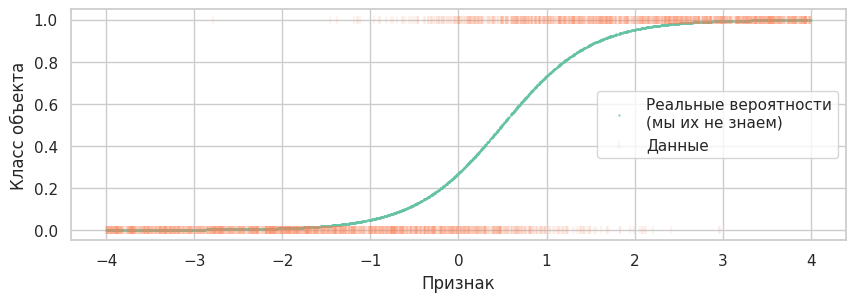

In [59]:
sample_size = 3000  # Размер выборки

# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(1 - 2 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности\n(мы их не знаем)")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();

Обучите логистическую регрессию, используя реализацию из `sklearn`, при этом свободный коэффициент должен присутствовать в модели. Укажите также `penalty='none'`.

In [60]:
model = LogisticRegression(penalty=None, fit_intercept=True)
model.fit(X, y)

LogisticRegression(penalty=None)

Напечатайте оценку коэффициентов

In [61]:
model.coef_[0][0], model.intercept_[0]

(2.048488233228897, -1.007660790371198)

Ниже объявлена сетка значений признака. По этой сетке постройте
* предсказания классов,
* предсказания вероятностей класса 1.

Визуализируйте эти предсказания. На график стоит нанести также обучающую выборку.

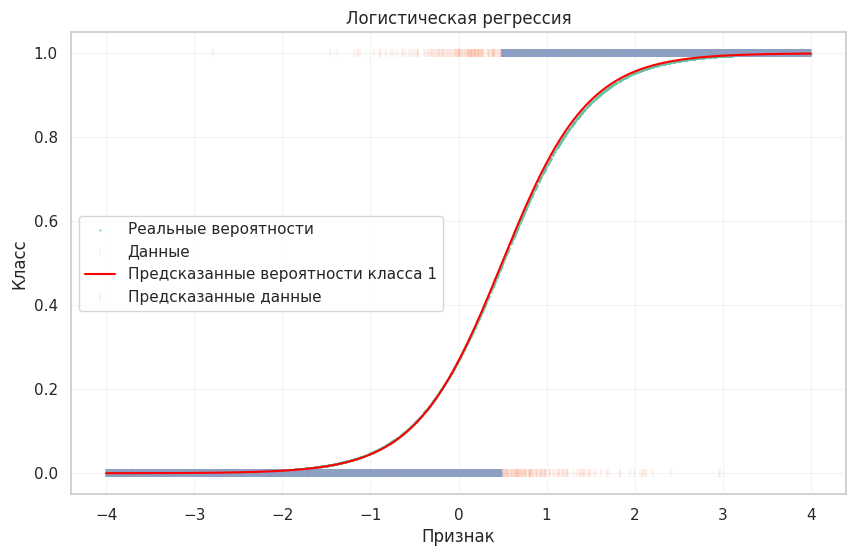

In [62]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))
y_grid_pred = model.predict(X_grid)
y_grid_proba = model.predict_proba(X_grid)[:, 1]

plt.figure(figsize=(10, 6))

plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")

plt.plot(X_grid, y_grid_proba, color="red", label="Предсказанные вероятности класса 1")
plt.scatter(X_grid, y_grid_pred, marker="|", alpha=0.1, label="Предсказанные данные")

plt.xlabel("Признак")
plt.ylabel("Класс")
plt.legend()
plt.title("Логистическая регрессия")
plt.grid(alpha=0.2)
plt.show()

Разбейте отрезок $[-4, 4]$ на одинаковые бины длины длины 0.2 и посчитайте в каждом бине долю объектов класса 1. Полученные значения добавьте на график предсказаний вероятностей и сравните эти графики. Проинтерпретируйте полученные результаты.

*Подсказка:* может помочь `np.digitize` и метод `groupby` для таблиц `pandas`. Рекомендуем посмотреть <a href="https://thetahat.ru/courses/python">обучающие ноутбуки</a> по библиотекам.

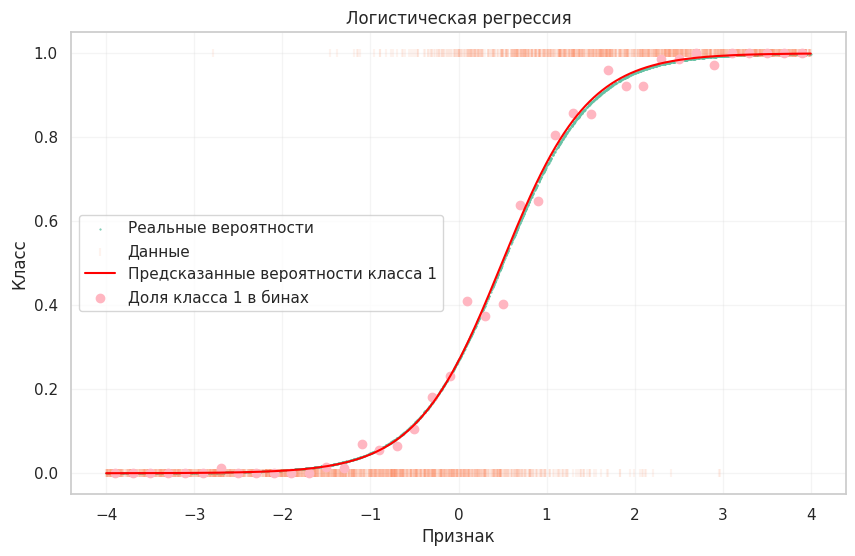

In [63]:
bins = np.arange(-4, 4.2, 0.2)
bin_indices = np.digitize(X.ravel(), bins)
df = pd.DataFrame({'X': X.ravel(), 'y': y, 'bin': bin_indices})
bin_means = df.groupby('bin')['y'].mean()
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(10, 6))

plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")

plt.plot(X_grid, y_grid_proba, color="red", label="Предсказанные вероятности класса 1")
plt.scatter(bin_centers, bin_means, color="lightpink", marker="o", label="Доля класса 1 в бинах")

plt.xlabel("Признак")
plt.ylabel("Класс")
plt.legend()
plt.title("Логистическая регрессия")
plt.grid(alpha=0.2)
plt.show()

Можно заметить, что точки графика доли 1 класса в бинах лежат в окрестности как реальной вероятностной прямой, так и предсказанной (они почти совпадают).

Повторите проведенное исследование для следующих данных и сравните результаты.

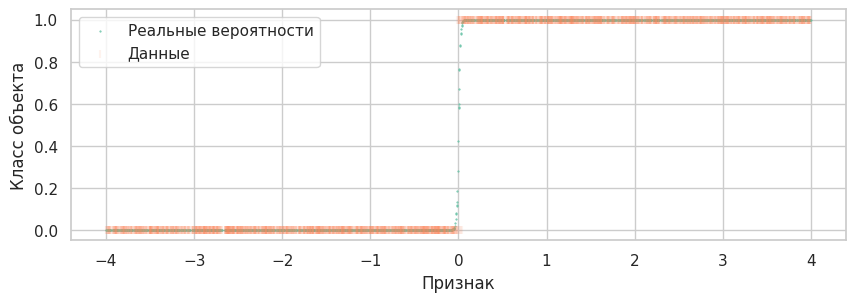

In [64]:
# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(-100 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();

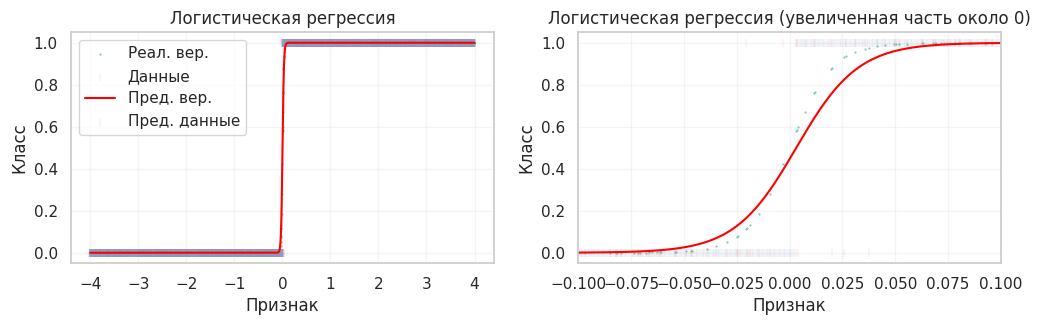

In [72]:
model = LogisticRegression(penalty=None, fit_intercept=True)
model.fit(X, y)

X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))
y_grid_pred = model.predict(X_grid)
y_grid_proba = model.predict_proba(X_grid)[:, 1]

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реал. вер.")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")

plt.plot(X_grid, y_grid_proba, color="red", label="Пред. вер.")
plt.scatter(X_grid, y_grid_pred, marker="|", alpha=0.1, label="Пред. данные")

plt.xlabel("Признак")
plt.ylabel("Класс")
plt.legend()
plt.title("Логистическая регрессия")
plt.grid(alpha=0.2)


plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, второй график
plt.scatter(X, y_mean_true, marker=".", s=1)
plt.scatter(X, y, marker="|", alpha=0.1)
plt.plot(X_grid, y_grid_proba, color="red")
plt.scatter(X_grid, y_grid_pred, marker="|", alpha=0.1)
plt.xlim(-0.1, 0.1)  # Ограничение по оси x
plt.xlabel("Признак")
plt.ylabel("Класс")
plt.title("Логистическая регрессия (увеличенная часть около 0)")
plt.grid(alpha=0.2)

plt.show()

**Выводы:**

В первом случае классы 0 и 1 пересекаются по вероятностям, и модель успешно аппроксимирует реальную вероятность, так как логистическая регрессия хорошо справляется с задачами, где зависимость между признаком и целевой переменной имеет плавный S-образный характер. Во втором случае, где классы четко разделены, модель также демонстрирует высокую точность. Хотя на увеличенном масштабе заметны отклонения зависимости от реальной, график получается более пологим. Так что логистическая регрессия хорошо работает с любыми данными, но для увеличения точности стоит рассматривать более гладкие зависимости.

---
### Задача 4.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- f92a2876d3f2b0d01fc396776be023a9 -->
Продолжим исследовать модель логистической регрессии. Сгенерируем данные, состоящие из двух бинарных признаков и бинарного таргета

In [7]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

x = np.random.choice(np.arange(8), p=probs, size=10000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype=">i8").view(np.uint8), axis=1)[:, -3:],
    columns=["feature_1", "feature_2", "target"],
)
data.head()

,feature_1,feature_2,target
0,0,1,0
1,1,0,0
2,1,1,0
3,1,1,0
4,0,0,0


Особенность таких данных &mdash; конечное число *возможных различных* объектов. В данном случае их всего 4, по количеству всех возможных комбинаций значений признака. Соответственно, любой моделью мы можем сделать только 4 *различных* предсказания. Исследуем, как с этим справляется логистическая регрессия.

Сначала для сравнения посчитайте долю класса 1 для каждой категории объектов.

*Подсказка:* используйте `pd.pivot_table`. Рекомендуем посмотреть <a href="https://thetahat.ru/courses/python">обучающие ноутбуки</a> по библиотекам.

In [11]:
pivot_table = pd.pivot_table(data, values='target', index=['feature_1', 'feature_2'], aggfunc='mean')
pivot_table

target
feature_1 feature_2          
0         0          0.132597
          1          0.192437
1         0          0.342933
          1          0.115652

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 14e68d57d58f901b3350e63f76b9f8db -->
Обучите логистическую регрессию с `penalty='none'` и получите предсказания вероятностей для этих четырех типов объектов. Представьте результаты в таком виде, чтобы их удобно было сравнивать с частотами, посчитанными ранее.

In [15]:
model = LogisticRegression(penalty=None)
model.fit(data[['feature_1', 'feature_2']], data['target'])

all_combinations = pd.DataFrame({
    'feature_1': [0, 0, 1, 1],
    'feature_2': [0, 1, 0, 1]
})

all_combinations['predicted_prob'] = model.predict_proba(all_combinations[['feature_1', 'feature_2']])[:, 1]

result = pd.merge(
    pivot_table.reset_index(),
    all_combinations,
    on=['feature_1', 'feature_2']
)
result = result.rename(columns={'target': 'actual_freq', 'predicted_prob': 'predicted_prob'})
result

,feature_1,feature_2,actual_freq,predicted_prob
0,0,0,0.132597,0.197376
1,0,1,0.192437,0.123473
2,1,0,0.342933,0.280734
3,1,1,0.115652,0.182725


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 1b868a951c9dec0be47540d5316f7e9f -->
Почему результаты не совпадают?

Для ответа на этот вопрос распишите формулу, которая задает модель логистической регрессии, указав все параметры. Какое предположение о данных при этом делает логистическая регрессия?

Метод predict_proba оценивает вероятность получить признак 1 с помощью следующей формулы:

$p(x) = \frac{1}{1 + e^{-x^T \theta}} = \frac{1}{1 + e^{-\theta_0 - \theta_1 x_1 - \theta_2 x_2}}$

где $x_1$ и $x_2$ - признак 1 или 2 соответственно.

Из неё можно выразить логит:

$\log(\frac{P(y = 1)}{1 - P(y = 1)}) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$

Можно заметить, что логит всегда линейно зависит от признаков и имеет 3 параметра, которые вычисляет модель. Но проблемы могут возникнуть, во-первых, из-за нелинейной зависимости от признаков, а во-вторых, из-за того, что у нас 4  возможных комбинации бинарных признаков, но коэффициента только 3. Мы никогда не сможем достаточно точно предсказать систему с 4 степенями свободы, задавая лишь 3 параметра. Из-за этого результаты не совпадают.

p.s. также мы делаем предположение, что признаки не зависят друг друга. Если это не так, предсказание модели также ухудшатся.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 1180c36f8ac39574c944b19ddee07271 -->
Предложите и реализуйте способ построения модели логистической регрессии так, чтобы она точнее предсказывала частоты, посчитанные ранее.

Опишите ваше предложение:

Надо добавить ещё один параметр в систему, чтобы итоговая размерность $\theta$ была 4. Для этого можно создать новый признак $x_1 x_2$, который будет равняться 1 только когда оба признака равны 1. Получается, так мы выделяем все 4 комбинации признаков, а значит можем лучше предсказывать целевой признак.

Реализация:

In [18]:
data["feature_1*feature_2"] = data["feature_1"] * data["feature_2"]

model_interaction = LogisticRegression(penalty=None)
model_interaction.fit(data[['feature_1', 'feature_2', 'feature_1*feature_2']], data['target'])

all_combinations = pd.DataFrame({
    'feature_1': [0, 0, 1, 1],
    'feature_2': [0, 1, 0, 1],
})
all_combinations["feature_1*feature_2"] = all_combinations["feature_1"] * all_combinations["feature_2"]

all_combinations['predicted_prob'] = model_interaction.predict_proba(
    all_combinations[['feature_1', 'feature_2', 'feature_1*feature_2']]
)[:, 1]

result = pd.merge(
    pivot_table.reset_index(),
    all_combinations,
    on=['feature_1', 'feature_2']
)
result = result.rename(columns={'target': 'actual_freq'})
result.drop(columns='feature_1*feature_2', inplace=True)
result


,feature_1,feature_2,actual_freq,predicted_prob
0,0,0,0.132597,0.132471
1,0,1,0.192437,0.192442
2,1,0,0.342933,0.343132
3,1,1,0.115652,0.115793


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3f951c224a4ac471c658ed7755ff9521 -->
**Выводы:**

Заметно, что после добавления дополнительного признака-комбинации предсказания модели сильно улучшились (теперь они совпадают с реальными вероятностями с точностью до 0.001). Значит, предложенный метод был и правда полезен для улучшения точности.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### <font color="orange"><i>Сложная часть</i></font>

Задачи 5-7: скачайте второй ноутбук с условием задания со страницы курса.